In [ ]:





import numpy as np
import pandas as pd

import scipy
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.set_theme()

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


In [ ]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Изучение датасета
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [ ]:
data.describe()

,was_married,children,salary,sex,age,home_cost,drive_info,happyness
count,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6.000000e+03,3230.000000,6000.000000
mean,0.842000,2.887167,8.463445e+07,0.661833,31.776667,1.019184e+07,0.729102,0.460160
std,0.364771,2.850285,8.022130e+07,0.473125,32.546372,3.120066e+05,0.444492,0.153727
min,0.000000,0.000000,1.765712e+06,0.000000,2.000000,9.824378e+06,0.000000,0.000000
25%,1.000000,1.000000,1.092669e+07,0.000000,10.000000,1.009639e+07,0.000000,0.351787
50%,1.000000,2.000000,4.301600e+07,1.000000,17.000000,1.017716e+07,1.000000,0.451588
75%,1.000000,4.000000,1.588318e+08,1.000000,32.000000,1.026920e+07,1.000000,0.562556
max,1.000000,9.000000,3.459271e+08,1.000000,100.000000,2.065792e+07,1.000000,1.000000


Категориальные признаки: was_married, drive_info, sex, profession
Численные признаки: children, salary, age, home_cost, happyness


<Axes: xlabel='home_cost', ylabel='Density'>

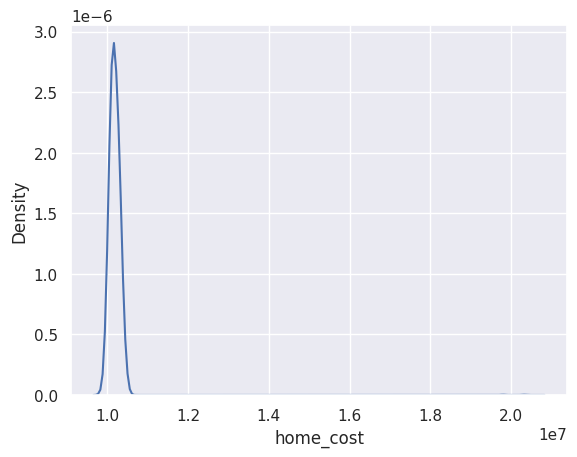

In [ ]:
sns.kdeplot(data['home_cost'][data['home_cost'] < 21000000])

<ipython-input-23-f02cd1ed1603>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['home_cost'][data['home_cost'] < 16000000])


<Axes: xlabel='home_cost', ylabel='Density'>

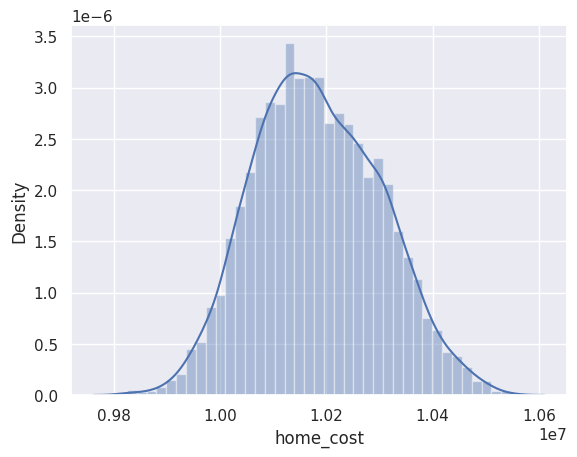

In [ ]:
sns.distplot(data['home_cost'][data['home_cost'] < 16000000])

<Axes: >

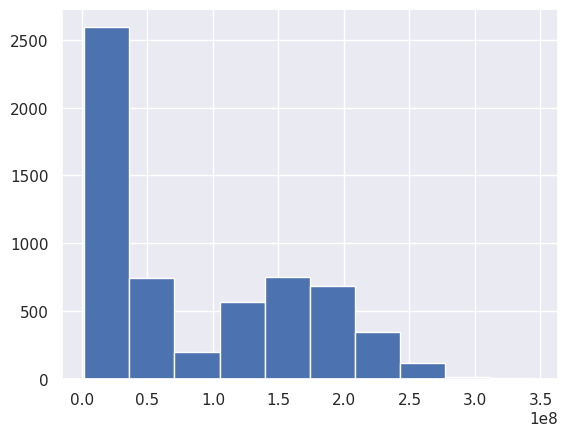

In [ ]:
data['salary'].hist()

<Axes: >

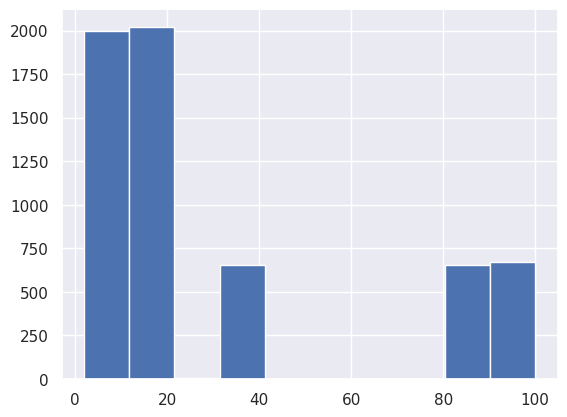

In [ ]:
data['age'].hist()

<Axes: >

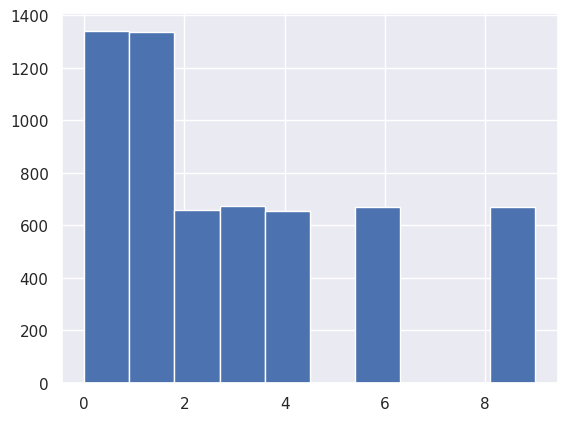

In [ ]:
data['children'].hist()

<ipython-input-24-bb37233a4c15>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['happyness']);


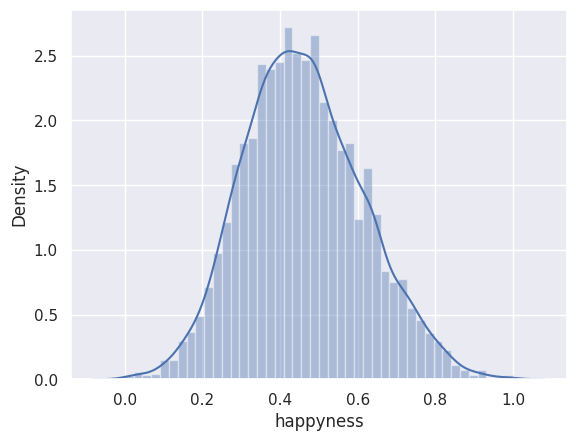

In [ ]:
sns.distplot(data['happyness'])

In [ ]:
data_without_prof = data.drop(columns = ['profession'])

<Axes: >

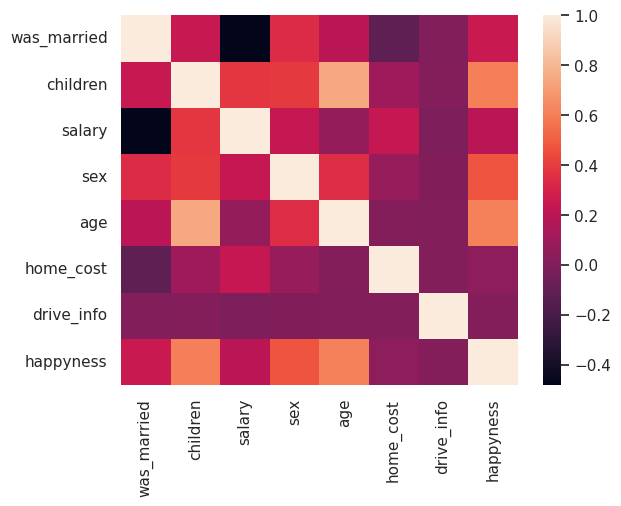

In [ ]:
sns.heatmap(data_without_prof.corr())

Нормальное распределение имеют happyness и home_cost (если из home_cost убрать выбросы)
Бесполезный признак: drive_info, так как имеет слишком большое количество пропусков, а также практически не коррелирует ни с одним другим важным признаком

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить их (`drop_duplicates`).
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (`dropna()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [ ]:
data_without_dupl = data.drop_duplicates()

In [ ]:
data_without_dupl = data_without_dupl.dropna(axis = 1)

<Axes: ylabel='home_cost'>

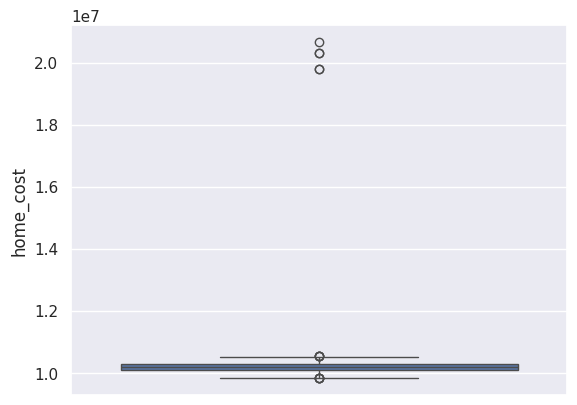

In [ ]:
sns.boxplot(data['home_cost'])

In [ ]:
data['home_cost'][data['home_cost'] > 17000000].count()

5

In [ ]:
data_z_s = scipy.stats.zscore(data['home_cost'])
data_z_s [data_z_s >= 3].count()

5

In [ ]:
data['z_home'] = scipy.stats.zscore(data['home_cost'])
data['z_home']


id
0     -0.497129
1     -0.164513
2      0.773581
3     -0.477124
4      0.087323
         ...   
495   -0.389311
496   -0.315259
497   -0.079748
498    0.203870
499    0.265775
Name: z_home, Length: 6000, dtype: float64

In [ ]:
data_home = data[abs(data['z_home']) < 3]
data_home.count()

was_married    5995
children       5995
salary         5995
sex            5995
age            5995
profession     5995
home_cost      5995
drive_info     3225
happyness      5995
z_home         5995
dtype: int64

# Проверка гипотез

Проверьте следующие гипотезы. Для доказательства - используйте визуализацию. (Статистические методы использовать не нужно)

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

<Axes: xlabel='salary', ylabel='Count'>

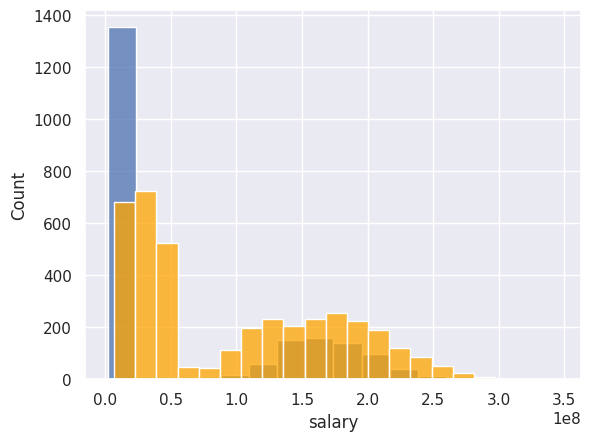

In [ ]:
sns.histplot(x = data['salary'][data['sex'] == 0], data = data)
sns.histplot(x = data['salary'][data['sex'] == 1], data = data, color = 'orange')

Нет, мужчины в среднем получают больше

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

<Axes: xlabel='salary', ylabel='Count'>

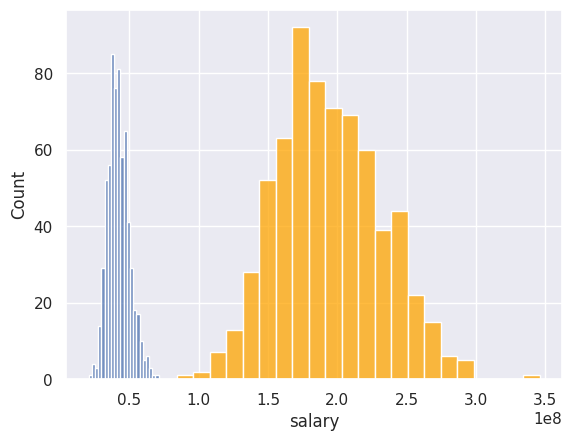

In [ ]:
sns.histplot(x = data['salary'][data['profession'] == 'Engineer'], data = data)
sns.histplot(x = data['salary'][data['profession'] == 'Entertainment'], data = data, color = 'orange')

Тут очевидно, что инженеры получают меньше

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

<Axes: xlabel='salary', ylabel='Count'>

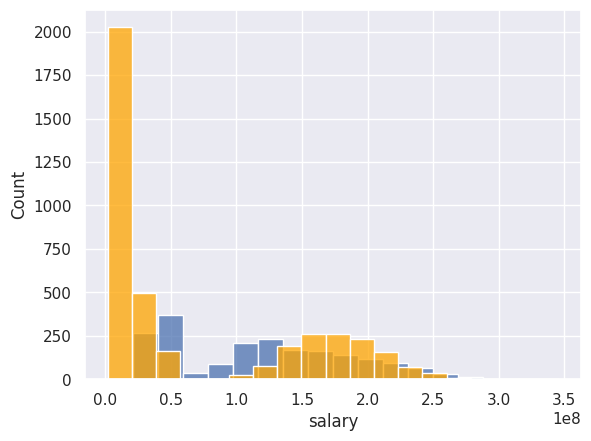

In [ ]:
sns.histplot(x = data['salary'][data['children'] > 3], data = data)
sns.histplot(x = data['salary'][data['children'] <= 3], data = data, color = 'orange')

Да, так как большое количество людей с 3 детьми и меньше имеют относительно низкую зарплату, ниже, чем у всех многодетных людей, из-за чего средняя зарплата у малодетных смещается вниз

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

<Axes: xlabel='home_cost', ylabel='Count'>

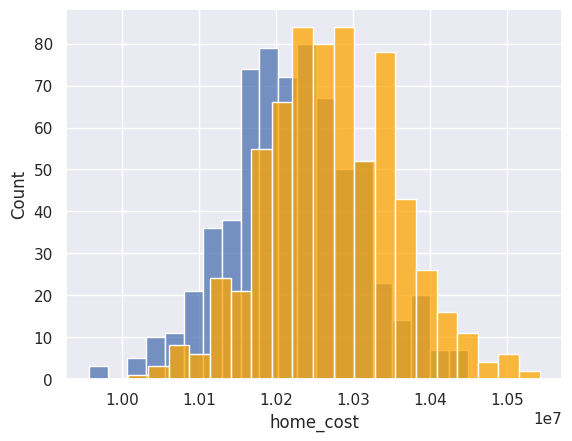

In [ ]:
sns.histplot(x = data['home_cost'][data['profession'] == 'Artist'], data = data)
sns.histplot(x = data['home_cost'][data['profession'] == 'Lawyer'], data = data, color = 'orange')

В среднем дома художников немного дешевле, чем дома адвокатов


<div class="alert alert-warning">
    
* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


<Axes: xlabel='home_cost', ylabel='Count'>

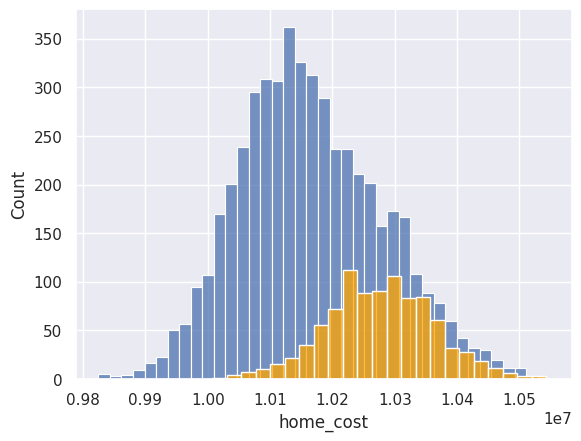

In [ ]:
sns.histplot(x = data['home_cost'][(data['was_married'] == 1) & (data['home_cost'] < 17000000)], data = data)
sns.histplot(x = data['home_cost'][(data['was_married'] == 0) & (data['home_cost'] < 17000000)], data = data, color = 'orange')

У тех, кто никогда не был в браке недвижимость в среднем дороже

<div class="alert alert-warning">
    
* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - составьте матрицу смежности, она выглядит примерно вот так:


In [ ]:
# ******  был в браке | не был в браке |
# мужчины      140    |      499       |
# женщины      241    |      298       |

In [ ]:
data_m_w = data.pivot_table(index = 'sex', columns = 'was_married', aggfunc = 'count', values = 'age')
data_m_w.columns = ['Не был(а) в браке', 'Был(а) в браке']
data_m_w.index = ['Женщины', 'Мужчины']
data_m_w

,Не был(а) в браке,Был(а) в браке
Женщины,670,1359
Мужчины,278,3693
